In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import cm
from matplotlib.cm import get_cmap
import seaborn as sns
%run finance.ipynb

### used ETFs for analysis
names = ['MSCI World', "MSCI World", 'S&P 500', 'Euro Stoxx 50 Nr.1', \
         'China', 'India', 'Emerging Asia', 'Small Caps USA Nr.1', \
        'Small Caps USA Nr.2', 'Dividenden Aristocrats Nr.1', 'Dividenden Aristocrats Nr.2', 'Growth Nr.1', 'Growth Nr.2',  \
        'REIT', 'TIPS', 'Money Market', 'GER Bonds 10y','US Bonds 1-3y', 'US Bonds 20y']

### these are the ticker symbols from finance.yahoo.com, which is the origin of the data
ETFs = ['WLD.PA', 'EUNL.DE', 'SPY', 'EXFN.L',  \
        'LG9.SI', 'LG8.SI', 'AASI.PA', 'SXRG.F', 'ISP6.L', 'XDND.F', 'UDVD.L', 'IDJG.AS', 'LGWT.DE', \
            'XREA.F', 'EMI.MI', 'C101.F', '8523.F', 'XUT3.L', 'IDTL.L']

bond_info = pd.read_excel("../ETF_investing.xlsx", sheet_name="Bonds")
etf_info = pd.read_excel("../ETF_investing.xlsx", sheet_name="ETF")
bond_info = bond_info[['Name', 'ISIN', 'yahoo ticker', 'physical', 'Acc']]
etf_info = etf_info[['Name', 'ISIN', 'yahoo ticker', 'physical', 'Acc']]

info = pd.concat([etf_info, bond_info])
info.reset_index(inplace=True)

### used to display asset informations in the correlation plot
text = "Nr         Category         Name         ISIN\n"  
name_list = []

for n, asset in enumerate(ETFs):
    full_name = str(info[info['yahoo ticker'] == asset]['Name']).split("\n")[0].split("    ")[1]
    ISIN = str(info[info['yahoo ticker'] == asset]['ISIN']).split("\n")[0].split("    ")[1]
    text += str(n) + "         " + names[n] + "         " + full_name + "         " + ISIN +"\n"
    name_list.append(full_name)
    
rel_path = "data/"

# Portfolio Theory - Data Analysis
In this portfolio we are able to check portfolio theory by constructing real portfolios of ETFs in arbitrary combinations of assets. We compute real returns and risks including different ETF prices and costs and look at different time horizons.

First of all we load the data and have a look at the available time horizon.

In [34]:
for n, name in enumerate(ETFs):
    df = pd.read_csv(rel_path + "{0}.csv".format(name))
    df['Date'] = pd.to_datetime(df['Date'], infer_datetime_format=True)
    print(name_list[n], "\t", df['Date'].min())

Lyxor MSCI World UCITS ETF D-EUR 	 2006-05-04 00:00:00
iShares Core MSCI World UCITS ETF USD (Acc) 	 2009-11-05 00:00:00
SPDR S&P 500 UCITS ETF 	 1993-01-29 00:00:00
iShares EURO STOXX 50 ex-Financials UCITS ETF 	 2013-12-20 00:00:00
Xtrackers MSCI China Index UCITS ETF 1C 	 2010-07-02 00:00:00
Xtrackers MSCI India Index UCITS ETF 1C 	 2010-07-02 00:00:00
Amundi MSCI Emerging Markets Asia UCITS ETF - ... 	 2011-05-02 00:00:00
iShares MSCI USA Small Cap UCITS ETF (Acc) 	 2012-09-21 00:00:00
iShares S&P SmallCap 600 UCITS ETF 	 2008-05-09 00:00:00
Xtrackers MSCI North America High Dividend Yie... 	 2014-02-27 00:00:00
SPDR S&P US Dividend Aristocrats UCITS ETF 	 2011-10-20 00:00:00
iShares EURO Total Market Growth Large UCITS ETF 	 2008-01-02 00:00:00
Lyxor MSCI EMU Growth (DR) UCITS ETF D-EUR 	 2008-01-02 00:00:00
Xtrackers FTSE Developed Europe Ex UK Property... 	 2014-09-25 00:00:00
Lyxor EuroMTS Inflation Linked Investment Grad... 	 2005-09-09 00:00:00
ComStage Commerzbank FED Funds 

Here we define the size of the monthly investment (amount) and define in the list nums, which assets from the ETFs list above we want to use in our portfolio. For these assets we have to define parameters, which are: proportion of portfolio (in percent), costs, TER

In [26]:
total_amount = 100
nums = [0, -2]
portfolio = [ETFs[n] for n in nums]
content = [name_list[n] for n in nums]

### parameter: full bond portfolio
#parameters = np.array([[0, 0, 0.003], [1, 0, 0.0012]])
### parameter: full stock portfolio
parameters = np.array([[1, 0, 0.003], [0, 0, 0.0012]])

In the next cell we perform a first example of a portfolio investment: First of all we compute the maximum time range we can use to invest with the given data. After that we prepare the ETF price data for the computation and compute the return for the given portfolio.

In [35]:
### Compute return risk for maximum range of dates between all ETFs in portfolio
(mindate, maxdate) = get_overlapping_timerange(ETFs)

assets_in_daterange = prepare_portfolio_data(mindate, maxdate, portfolio)

print(mindate, maxdate)
r = portfolio_return_risk(num_data, parameters, total_amount)
print(r)

2015-01-21 00:00:00 2019-05-29 00:00:00


/home/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':


Only one stock is part of portfolio, because of stock mix!
(7.312631566860499, 167.55953857427562)


In the following we perform the same computation as above, but not for the fixed distribution of the assets in the portfolio. Here we adjust the proportion of each asset in the portfolio and compute the corresponding return. Simultaneously we plot the return over the risk for each portfolio distribution and get a portfolio curve

2009-09-08 00:00:00 2010-09-08 05:49:12 1


/home/chris/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys


1
Only one stock is part of portfolio, because of stock mix!
0
Only one stock is part of portfolio, because of stock mix!
2009-09-08 00:00:00 2012-09-07 17:27:36 3
1
Only one stock is part of portfolio, because of stock mix!
0
Only one stock is part of portfolio, because of stock mix!
2009-09-08 00:00:00 2014-09-08 05:06:00 5
1
Only one stock is part of portfolio, because of stock mix!
0
Only one stock is part of portfolio, because of stock mix!


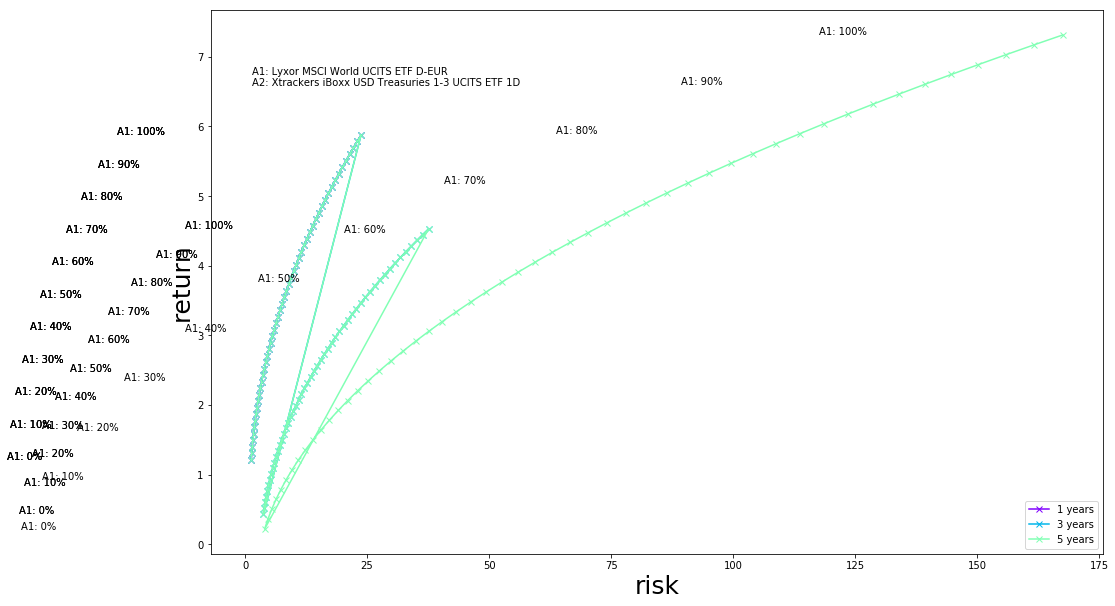

In [28]:
### Plot return-risk curve
ret, var, label = [], [], []
#cmap = get_cmap('Oranges')
colors = iter(cm.rainbow(np.linspace(0,1,5)))

plt.figure(figsize=(16,10));
for years in range(1, 7, 2):
    maxdate = mindate + pd.to_timedelta(years, unit='y')
    print(mindate, maxdate, years)
    for n in range(0, 101, 2):
        parameters = np.array([[n/100, 0, 0.003], [1.-n/100, 0, 0.0012]]);
        assets = prepare_portfolio_data(mindate, maxdate, portfolio)
        out = portfolio_return_risk(assets, parameters, total_amount);
        ret.append(out[0]);
        var.append(out[1]);
        if n%10 == 0:
            label.append((var[-1], ret[-1], "A1: {0:.0f}%".format(n)))
    c = next(colors)
    plt.plot(var, ret, 'x-',c=c, label="{0} years".format(years));
    for text in label:
        plt.text(text[0]-50, text[1], text[2])
plt.text(min(var)*1.1, max(ret)*0.9, "\n".join(["A{0}: {1}".format(n+1, x) for n, x in enumerate(content)]))
plt.xlabel("risk", fontsize=25);
plt.ylabel("return", fontsize=25);
plt.legend(loc=4)